## 判別分析

In [1]:
import pandas as pd

loan3000_df = pd.read_csv('./datasets/loan3000.csv')

In [2]:
loan3000_df.outcome = loan3000_df.outcome.astype('category')

In [3]:
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

In [4]:
X = loan3000_df[predictors]
y = loan3000_df[outcome]

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)

pd.DataFrame(loan_lda.scalings_, index=X.columns)

,0
borrower_score,7.175839
payment_inc_ratio,-0.099676


In [6]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000_df[predictors]), columns=loan_lda.classes_)
pred.head()

,default,paid off
0,0.553544,0.446456
1,0.558953,0.441047
2,0.272696,0.727304
3,0.506254,0.493746
4,0.609952,0.390048


In [7]:
import numpy as np

center = np.mean(loan_lda.means_, axis=0)
slope = -loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000_df, pred['default']], axis=1)
lda_df.head()

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio,default
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135,0.553544
1,16982,default,credit_card,15.49,0.40,5.43165,0.558953
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003,0.272696
3,34580,paid off,major_purchase,21.11,0.40,2.33482,0.506254
4,14424,default,debt_consolidation,16.46,0.45,12.10320,0.609952


### プロット

対角線左のデータポイントは返済不能（確率が0.5を超える）と予測される。

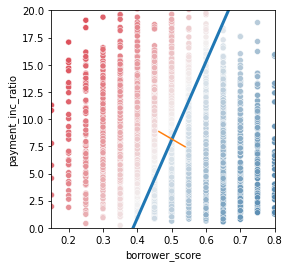

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(4, 4))
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio',
                                  hue='default', data=lda_df,
                                  palette=sns.diverging_palette(240, 10, n=9, as_cmap=True),
                                  ax=ax, legend=False)
ax.set_ylim(0, 20)
ax.set_xlim(0.15, 0.8)
ax.plot((x_0, x_20), (0, 20), linewidth=3)
ax.plot(*loan_lda.means_.transpose())